# 🧠 Self-Attention Mechanism in Transformers

Self-attention is the key innovation behind the Transformer model. It allows the model to **dynamically focus on different parts of the input sequence** when processing each token.

This mechanism lets a word "look at" other words in the sentence and decide which ones are important — based on *context*.

We'll break it down both **conceptually and mathematically** in this notebook.


## 🔍 What Is Self-Attention?

Self-attention is a way for a model to **assign importance scores** to other tokens in the input sequence while processing a specific token.

It answers this question:
> “While processing this word, what other words should I pay attention to?”

For example:
- In the sentence: "The cat sat on the mat because it was tired."
- "it" should attend more to "cat" than to "mat" — **self-attention helps models learn this automatically.**


## 🧠 Why Is Self-Attention Powerful?

- It allows **parallel processing** (unlike RNNs)
- It captures **context and relationships** between all words — even far apart ones
- It can **adapt dynamically** depending on the input sentence


## 🧾 How Self-Attention Works: Step-by-Step

Let’s say we have 3 words: `["I", "love", "GenAI"]`

Each word is first converted into an embedding (a vector).

Then for each word:
1. We create 3 vectors: **Query (Q)**, **Key (K)**, and **Value (V)**  
   - All are learned during training using linear layers.
   
2. We compute attention **scores** by taking the dot product of the Query of the current word with the Keys of all words (including itself).

3. These scores are **scaled** (divided by √d) to stabilize gradients.

4. We apply **softmax** to turn scores into probabilities.

5. We compute a **weighted sum of Value vectors**, using those probabilities.

That result is the **new representation** of the current word — *now it “knows” which other words were important*.


## 🧮 Self-Attention: Mathematical Formula

Let:
- X = Input matrix (n tokens × d model)
- W<sub>Q</sub>, W<sub>K</sub>, W<sub>V</sub> = learned weight matrices for Query, Key, and Value

Then:
- Q = X × W<sub>Q</sub>  
- K = X × W<sub>K</sub>  
- V = X × W<sub>V</sub>

### Attention Formula:

Attention(Q, K, V) = softmax(Q × Kᵀ / √d<sub>k</sub>) × V


Where:
- Q × Kᵀ gives us similarity between tokens
- Scaling by √d<sub>k</sub> prevents exploding gradients
- softmax turns scores into weights
- multiplying with V gives the weighted representation


In [1]:
import numpy as np

# Step 1: Define dummy Q, K, V for 3 tokens (dimension = 3)
Q = np.array([[1, 0, 1],    # token 1
              [0, 1, 0],    # token 2
              [1, 1, 0]])   # token 3

K = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 1, 0]])

V = np.array([[0.1, 0.0, 0.3],
              [0.0, 0.2, 0.0],
              [0.3, 0.1, 0.4]])

print("Q:\n", Q)
print("K:\n", K)
print("V:\n", V)


Q:
 [[1 0 1]
 [0 1 0]
 [1 1 0]]
K:
 [[1 0 1]
 [0 1 0]
 [1 1 0]]
V:
 [[0.1 0.  0.3]
 [0.  0.2 0. ]
 [0.3 0.1 0.4]]


In [2]:
# Step 2: Compute raw attention scores = Q @ K.T
scores = Q @ K.T
print("Raw Attention Scores:\n", scores)


Raw Attention Scores:
 [[2 0 1]
 [0 1 1]
 [1 1 2]]


📌 Each element scores[i][j] is the dot product between the Query of token i and Key of token j.

## Scale the scores

In [3]:
# Step 3: Scale by sqrt(dk)
dk = Q.shape[1]  # dimension of key/query vectors
scaled_scores = scores / np.sqrt(dk)
print("Scaled Scores:\n", scaled_scores)


Scaled Scores:
 [[1.15470054 0.         0.57735027]
 [0.         0.57735027 0.57735027]
 [0.57735027 0.57735027 1.15470054]]


##Applying Softmax and getting weights

In [4]:
# Step 4: Apply softmax to each row
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # numerical stability
    return exp_x / np.sum(exp_x)

attention_weights = np.apply_along_axis(softmax, 1, scaled_scores)
print("Attention Weights:\n", attention_weights)


Attention Weights:
 [[0.53289684 0.16794345 0.29915971]
 [0.21917211 0.39041395 0.39041395]
 [0.26445846 0.26445846 0.47108308]]


## weighted sum of values

In [5]:
# Step 5: Compute output = attention_weights @ V
output = attention_weights @ V
print("Final Output Vectors:\n", output)


Final Output Vectors:
 [[0.1430376  0.06350466 0.27953294]
 [0.13904139 0.11712418 0.22191721]
 [0.16777077 0.1        0.26777077]]


#What This Shows
For each token, we now have a contextualized vector — based on how much attention it paid to other tokens.

Example:

If token 1 gave high attention to token 2, it will reflect more of token 2’s V vector in its output.

This is how self-attention helps encode relationships and context into the embeddings.

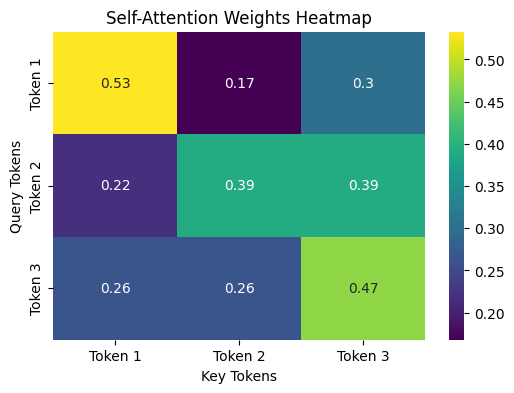

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Plot attention weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=['Token 1', 'Token 2', 'Token 3'], yticklabels=['Token 1', 'Token 2', 'Token 3'])
plt.title("Self-Attention Weights Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()


 Here Each row represents a Query token (the token we're updating).

Each column represents a Key token (the token it's attending to).

The values in the heatmap are the attention weights (how much attention is paid).

For example, if cell (1, 2) has a high value, that means Token 1 is focusing strongly on Token 2.

This dynamic weighting allows each token to gather context from others — making transformers very powerful.

